# DATA VISUALIZATION WITH HABERMAN'S CANCER SURVIVAL DATASET

### HABERMAN'S DATASET:

-case study conducted between 1958-70 on breast cancer patients to check the rae of their survival after the surgery.            
-contains four attributes(features):                                                                                            
    1.Age : Age of patient at time of operation                                                                                 
    2.Op_year : Patient's year of operation (year - 1900)                                                                      
    3.axil_nodes : Number of positive axillary nodes detected                                                                   
    4.Surv_status : Survival status (class attribute)                                                                                               1 = the patient survived 5 years or longer                                                                                        2 = the patient died within 5 year                                                                           

In [23]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#loading haberman's dataset 

haberman = pd.read_csv("haberman.csv")



In [24]:
#to specify column names
column_names = ['Age', 'Op_year', 'axil_nodes', 'Surv_status']
haberman.columns = column_names

In [25]:
#No. of datapoints and attributes

print(haberman.shape)


(305, 4)


In [26]:
#Cloumn names

print(haberman.columns)


Index(['Age', 'Op_year', 'axil_nodes', 'Surv_status'], dtype='object')


In [27]:
#number of datapoints per class

haberman["Surv_status"].value_counts()

#imbalanced dataset
#There are two classes:1 & 2

1    224
2     81
Name: Surv_status, dtype: int64

### OBJECTIVE: 
To perform Exploratary Data Analysis on the given haberman's dataset.

# BIVARIATE ANALYSIS

## SCATTER PLOT

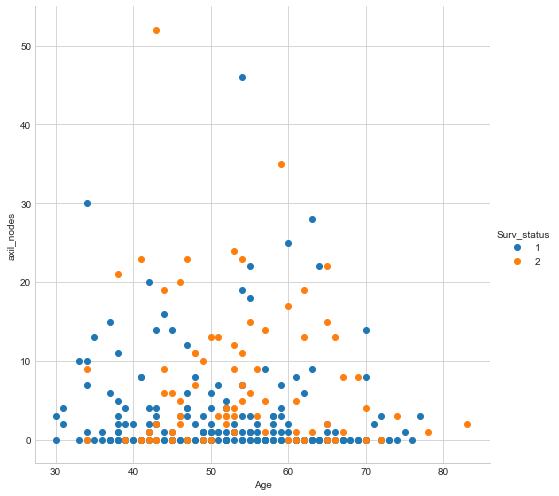

In [28]:
#A scatter plot between age and axil_nodes

sb.set_style("whitegrid");
sb.FacetGrid(haberman, hue="Surv_status", size=7) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.show();

Observations:
-using age and axil nodes as features in the 2D scatter plot it is very difficult to separate patients with survival status 1 & 2.


## PAIR PLOTS

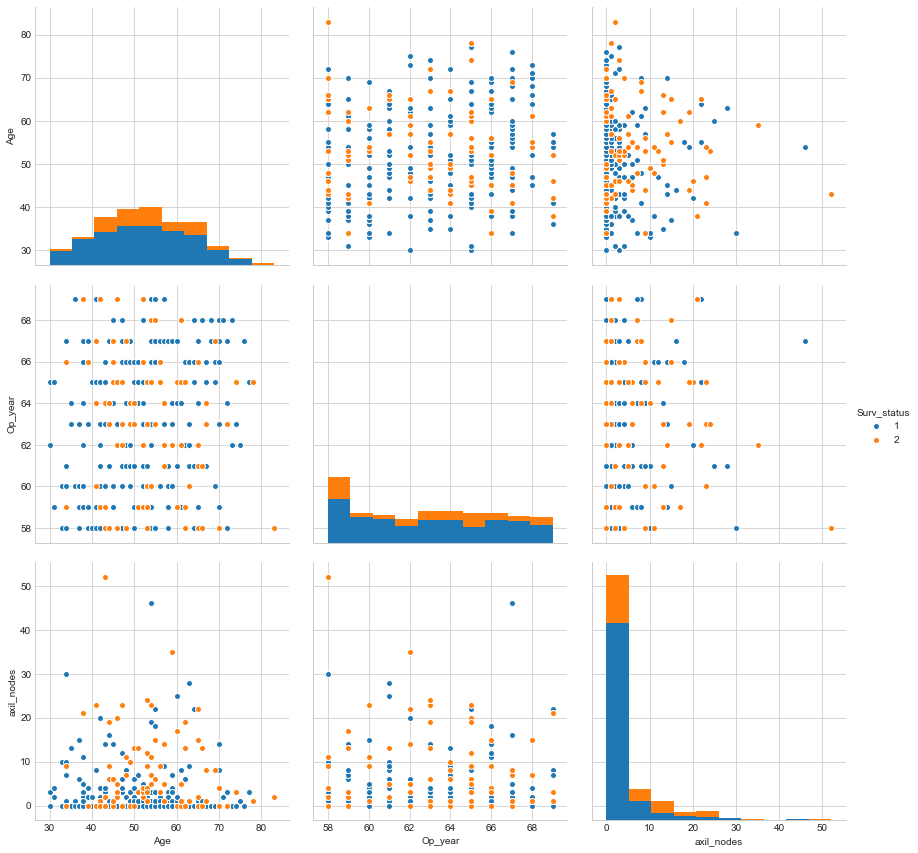

In [29]:
# 3c2 pair plot

plt.close();
sb.pairplot(haberman,hue="Surv_status",vars=["Age","Op_year" , "axil_nodes"], size=4)
plt.show();

#### Observations

1.It is observed that no combination of features is that useful enough to draw a line between positive and negative survival status.                                                                                            
2.It is seen that all the above pair plots have lots of overlapping of data points.                                             
3.Therefore it can be conluded that it is difficult to predict the survival chances of cancer patients after the surgery.

# UNIVARIATE ANALYSIS

## HISTOGRAM AND PDF


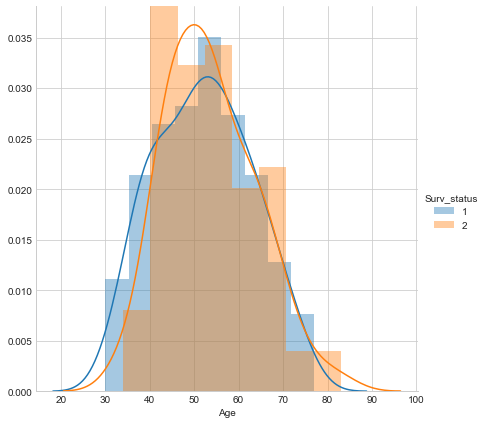

In [30]:
#histogram with respect to age

sb.FacetGrid(haberman, hue="Surv_status", size = 6)\
  .map(sb.distplot, "Age")\
  .add_legend();  

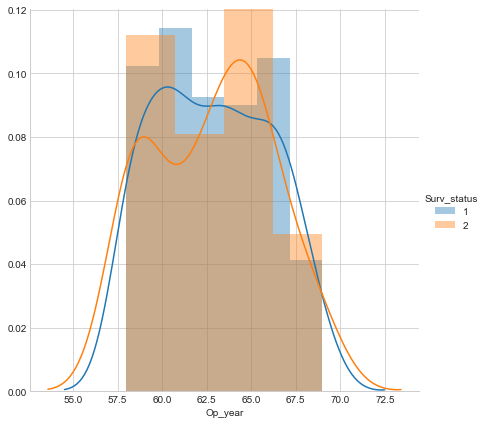

In [31]:
#histogram with respect to year of operation

sb.FacetGrid(haberman, hue="Surv_status", size = 6)\
  .map(sb.distplot, "Op_year")\
  .add_legend();  

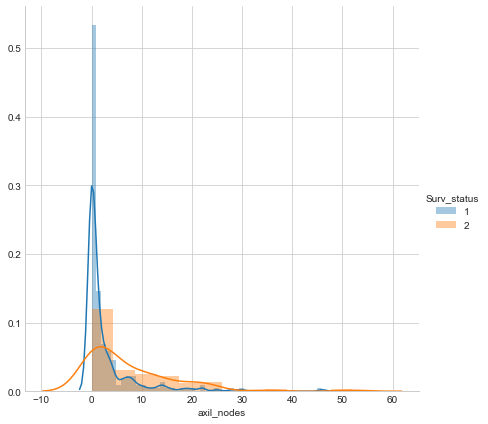

In [32]:
#histogram with respect to number of axl nodes

sb.FacetGrid(haberman, hue="Surv_status", size = 6)\
  .map(sb.distplot, "axil_nodes")\
  .add_legend();  

# CDF

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


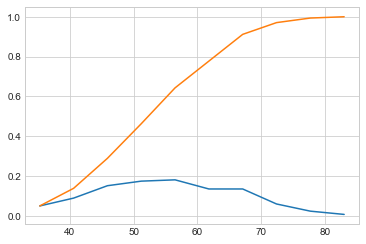

In [33]:
#cdf with respect to age
counts, bin_edges = np.histogram(haberman['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


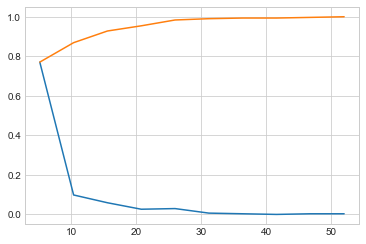

In [34]:
#cdf with respect to number of axil nodes
counts, bin_edges = np.histogram(haberman['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.73442623 0.         0.         0.         0.         0.
 0.         0.         0.         0.26557377]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


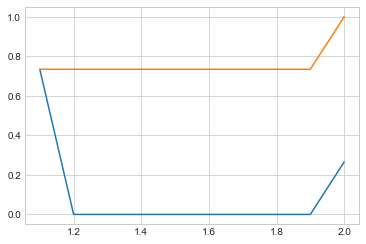

In [35]:
#cdf with respect to survival status

counts, bin_edges = np.histogram(haberman['Surv_status'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

## Box plots

In [36]:
haberman['Surv_status'] = haberman['Surv_status'].map({1:'Survived', 2:'Dead'})

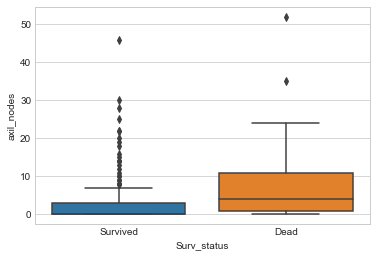

In [37]:
sb.boxplot(x="Surv_status", y="axil_nodes", data= haberman)
plt.show();

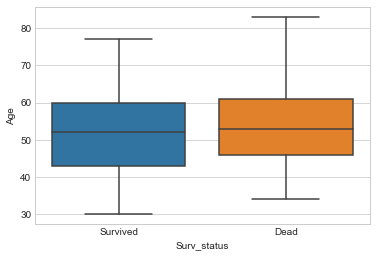

In [38]:
sb.boxplot(x="Surv_status", y="Age", data= haberman)
plt.show();

## VIOLIN PLOT


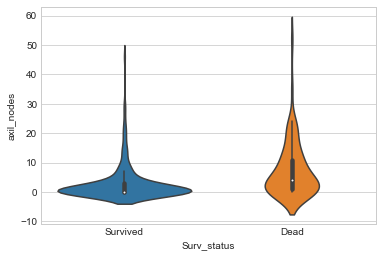

In [39]:
sb.violinplot(x="Surv_status", y="axil_nodes", data= haberman, size=8)
plt.show();

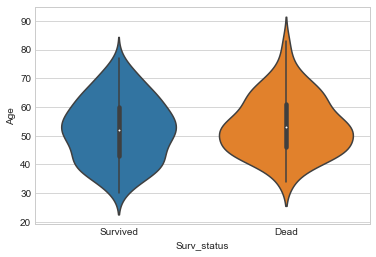

In [40]:
sb.violinplot(x="Surv_status", y="Age", data= haberman, size=8)
plt.show();

# CONCLUSIONS: